# 01 Feature Engineering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# to display all columns in a dataframe in notebook
pd.pandas.set_option('display.max.columns', None)

In [10]:
df = pd.read_csv("../data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


After a first look into the data, we can drop the ID column, since it is just a number for identify each house

In [11]:
df.drop("Id", axis=1, inplace=True)
df.shape

(1460, 80)

From the shape output we know we have 1460 houses (observations) and 800 columns in our data. Then we can see all the columns as one of them is the label: **SalePrice** and the other 79 variables are features. 

## Steps for feature Engineering
### 1 Look at the target variable: House price (SalePrice)

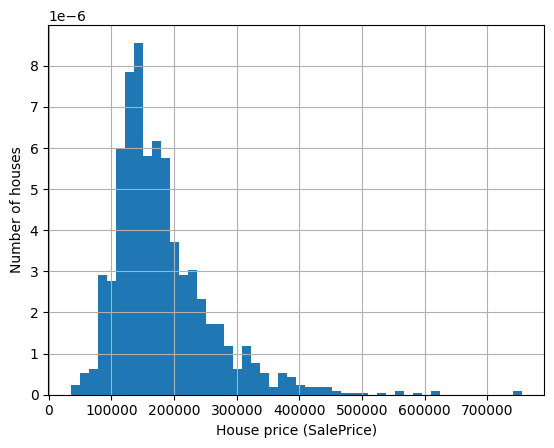

In [14]:
df["SalePrice"].hist(bins=50, density=True)
plt.ylabel("Number of houses")
plt.xlabel("House price (SalePrice)")
plt.show()

We found the distribution of the house price is numerical and right-skewed. We can use logarithmic transformation to transform the data into more bell-shape.

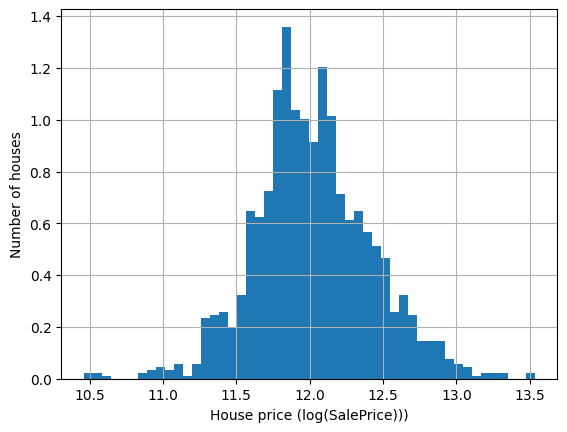

In [16]:
np.log(df['SalePrice']).hist(bins=50, density=True)
plt.ylabel("Number of houses")
plt.xlabel("House price (log(SalePrice)))")
plt.show()

### 2 Categorical and numerical variables
We first classify which columns are categorical and which columns are numerical.

In [18]:
unique_dtypes = df.dtypes.unique()
unique_dtypes # we can see we have three types of data type in our dataframe: Object(O), int64, float64

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [21]:
# for categorical variables
# create a list to hold categorical feature names
cat_vars = [var for var in df.columns if df[var].dtype=="O"]

# MSSubClass is also a categorical feature, although it is numerical data: you can see the data desription for more detail
cat_vars = cat_vars + ["MSSubClass"]

# Convert make sure all categorical data is set
df[cat_vars] = df[cat_vars].astype("O")

In [23]:
# for numerical variables
num_vars = [var for var in df.columns if var not in cat_vars and var != 'SalePrice']

### 3 Handling Missing values

In [24]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
df[vars_with_na].isnull().mean().sort_values(ascending=False)*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

We can see some of the variable have really large proportion of missing values in it, especially the first three with over 90% of missing values, *PoolQC, MiscFeature, Alley*.

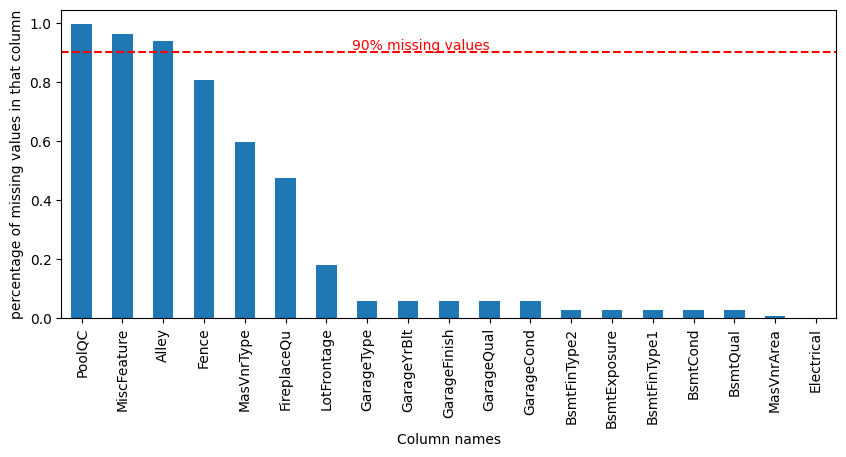

In [31]:
# plot the missing value percentage in barplot
df[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel("percentage of missing values in that column")
plt.xlabel("Column names")
plt.axhline(y=0.9, color='r', linestyle="--")
plt.text(10, 0.9, "90% missing values", color='red', ha='right', va="bottom")
plt.show()

Let us see how many columns have NA values:

In [33]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]
print(f"There are {len(cat_na)} categorical variables have NAs.")
print(f"There are {len(num_na)} numerical variables have NAs.")

There are 16 categorical variables have NAs, and they are ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
There are 3 numerical variables have NAs.


We can use imputation technique to handle but let us first see their relationship with our target variable.

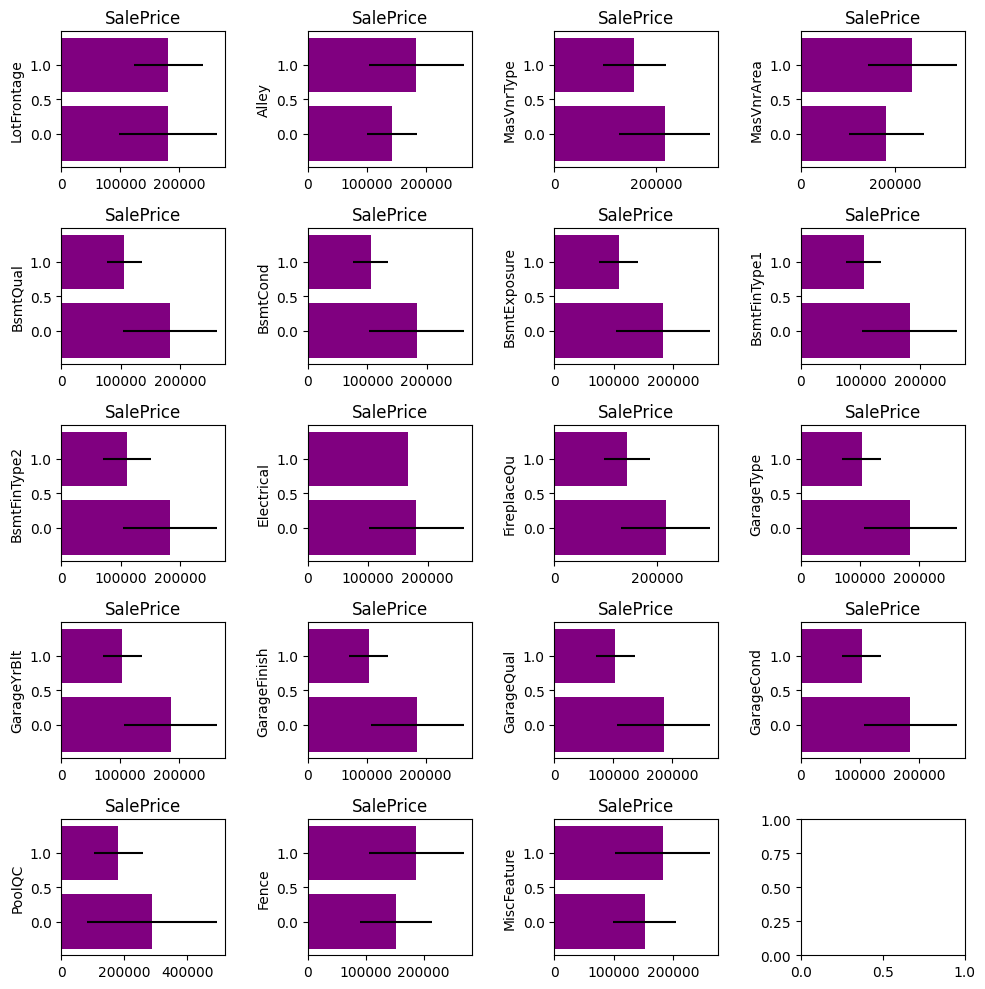

In [80]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))

for i, var in enumerate(vars_with_na):

    row = i // 4
    col = i % 4

    df_copy = df.copy() # use pandas.copy() to copy the input dataframe and not overwrite the original one
    df_copy[var] = np.where(df_copy[var].isnull(), 1, 0) # set missing value as 1 and other as 0

    # Determine the median and standard deviation price in the groups 1 and 0
    tmp = df_copy.groupby(var)['SalePrice'].agg(['mean', 'std'])
    axs[row, col].barh(y=tmp.index, width=tmp['mean'], xerr=tmp['std'], color="purple")
    axs[row, col].set_title(f"SalePrice by {var}")
    axs[row, col].set_title("SalePrice")
    axs[row, col].set_ylabel(var)

plt.tight_layout()
plt.show()

From the above figure, we can observed some feature which include missing values has impact on the housing price. These features might be a good predictor of the Sale price.